# Copy_of_tugasgraph_2

## Library/Environment Module

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


## Scraping/Crawling Berita

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799899/indonesiapetakan-kekuatan-lawan-di-penyisihan-grup-piala-dunia-u-17?utm_source=antaranews&utm_medium=desktop&utm_campaign=menu_news"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



				Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.
Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.
“Kita libatkan coach Frank Wormuth serta coach Indra Sjafri untuk membaca data tersebut dan menyusun strategi dalam laga nanti,” kata Bima ketika memimpin latihan di Jakarta, Senin.
Ia mengaku optimistis dengan kemampuan anak-anak yang telah melakukan serangkaian pemusatan latihan.
Mereka telah bertanding dengan Barcelona dan Kashima Antlers pada Agustus lalu.
Kemudian pemusatan latihan di Jerman dengan menghadapi sejumlah tim, meskipun tidak melakoni uji 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Vektorisasi TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.
10: 0.1938
17: 0.1335
antara: 0.1671
babak: 0.1938
di: 0.1114
digelar: 0.1671
dunia: 0.1482
grup: 0.1671
indonesia: 0.1671
jakarta: 0.1335
kekuatan: 0.1671
lawan: 0.2964
melakukan: 0.1671
menjadi: 0.1938
mereka: 0.1215
mulai: 0.1938
nasional: 0.3876
november: 0.1938
pemetaan: 0.1938
penyisihan: 0.1938
piala: 0.1482
telah: 0.1482
tim: 0.4006
yang: 0.2052

Kalimat 2: Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.
17: 0.1083
akan: 0.1573
berbagai: 0.1573
bima: 0.1356
bung: 0.1356
dan: 0.0904
di

## Pre-processing dan Tabeling

In [ ]:
# Cleansing step to remove unwanted characters
sentences = [sentence.replace('\n\t\t\t\t', ' ').replace('\t\t\t\t', ' ') for sentence in sentences]

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Membuat DataFrame untuk menyimpan data TF-IDF
df_tfidf = pd.DataFrame(tfidf_values, columns=feature_names)

# Set sentences as the index
df_tfidf = df_tfidf.set_index(pd.Index(sentences))

# Menampilkan DataFrame
df_tfidf

,10,17,2023,aditya,agustus,akan,anak,antara,antlers,arahan,...,tomo,uji,untuk,video,waktu,wicaksono,wormuth,yaitu,yakni,yang
Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.,0.193813,0.133530,0.000000,0.000000,0.000000,0.000000,0.000000,0.167138,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205216
"Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.",0.000000,0.108345,0.000000,0.000000,0.000000,0.157258,0.000000,0.000000,0.000000,0.000000,...,0.135614,0.000000,0.135614,0.157258,0.000000,0.000000,0.000000,0.157258,0.000000,0.083255
"“Kita libatkan coach Frank Wormuth serta coach Indra Sjafri untuk membaca data tersebut dan menyusun strategi dalam laga nanti,” kata Bima ketika memimpin latihan di Jakarta, Senin.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.175858,0.000000,0.000000,0.000000,0.175858,0.000000,0.000000,0.000000
Ia mengaku optimistis dengan kemampuan anak-anak yang telah melakukan serangkaian pemusatan latihan.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.521481,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160072
Mereka telah bertanding dengan Barcelona dan Kashima Antlers pada Agustus lalu.,0.000000,0.000000,0.000000,0.000000,0.352892,0.000000,0.000000,0.000000,0.352892,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Kemudian pemusatan latihan di Jerman dengan menghadapi sejumlah tim, meskipun tidak melakoni uji joba melawan timnas muda Jerman sesuai arahan Wormuth.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235388,...,0.000000,0.235388,0.000000,0.000000,0.000000,0.000000,0.202990,0.000000,0.000000,0.000000
“Ini sesuai masukan dari Coach Frank yang sudah memilih lawan mana yang dihadapi Timnas U-17 di Jerman beberapa waktu lalu.,0.000000,0.178938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.259721,0.000000,0.000000,0.000000,0.000000,0.275001
"Tim yang dipilih sesuai dengan kebutuhan latihan tim,” kata dia.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194943
"Ia mengatakan saat ini anak-anak asuhnya sudah memiliki mental yang bagus, fisik yang lebih baik dan teknik permainan yang semakin bagus.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363730,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334949
"“Mereka semua fokus pada Piala Dunia ini dan ini merupakan kesempatan langka bagi mereka, mungkin sekali seumur hidup.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Import CSV

In [ ]:
df_tfidf.to_csv('Graoph.csv', index=True)

## Perbandingan kesamaan antar kalimat menggunakan Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2686


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2686
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0318
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1107
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0669
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0800
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.1558
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.2433
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0687
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0948
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0623
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1486
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0440
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1185
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0133
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0726
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0812
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.1409
Cosine Similarity antara Ka

## Perbandingan kesamaan antar kalimat menggunakan Cosine Similarity

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13
Kalimat 1,1.000000,0.268590,0.031816,0.110697,0.066890,0.080035,0.155829,0.243258,0.068737,0.094784,0.062278,0.148551,0.043973
Kalimat 2,0.268590,1.000000,0.118549,0.013327,0.072606,0.081244,0.140919,0.126175,0.082899,0.066903,0.035683,0.226011,0.000000
Kalimat 3,0.031816,0.118549,1.000000,0.029267,0.023772,0.074339,0.135658,0.091485,0.014206,0.016843,0.000000,0.068614,0.000000
Kalimat 4,0.110697,0.013327,0.029267,1.000000,0.104352,0.114696,0.044020,0.127831,0.290714,0.000000,0.068606,0.000000,0.000000
Kalimat 5,0.066890,0.072606,0.023772,0.104352,1.000000,0.032663,0.068160,0.051096,0.024584,0.150132,0.093500,0.024362,0.000000
Kalimat 6,0.080035,0.081244,0.074339,0.114696,0.032663,1.000000,0.182625,0.208194,0.000000,0.000000,0.090158,0.016250,0.000000
Kalimat 7,0.155829,0.140919,0.135658,0.044020,0.068160,0.182625,1.000000,0.109535,0.156171,0.075948,0.049050,0.043694,0.000000
Kalimat 8,0.243258,0.126175,0.091485,0.127831,0.051096,0.208194,0.109535,1.000000,0.065296,0.000000,0.083551,0.000000,0.000000
Kalimat 9,0.068737,0.082899,0.014206,0.290714,0.024584,0.000000,0.156171,0.065296,1.000000,0.079087,0.059742,0.014559,0.000000
Kalimat 10,0.094784,0.066903,0.016843,0.000000,0.150132,0.000000,0.075948,0.000000,0.079087,1.000000,0.066245,0.078372,0.000000


### Menampilkan Tingkat similarity antar kalimat

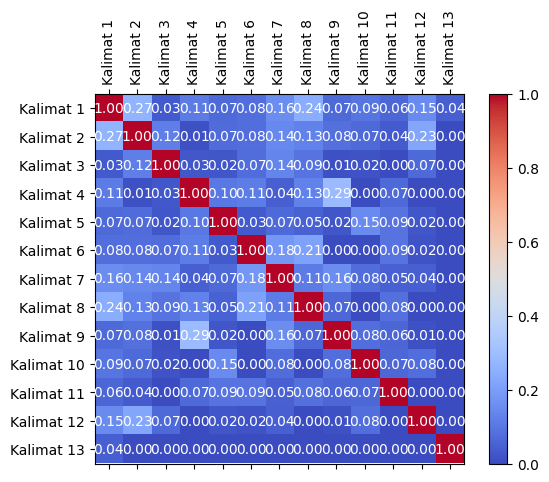

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

## Menampilkan Tingkat similarity antar kalimat

In [ ]:
# Buat grafik dari matriks similarity
G = nx.Graph()
kal = []
# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)
    kalimat=sentence
    kal.append(kalimat)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of  Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.: 15.5399
Closeness Centrality of Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.: 15.1055
Closeness Centrality of “Kita libatkan coach Frank Wormuth serta coach Indra Sjafri untuk membaca data tersebut dan menyusun strategi dalam laga nanti,” kata Bima ketika memimpin latihan di Jakarta, Senin.: 22.6696
Closeness Centrality of Ia mengaku optimistis dengan kemampuan anak-anak yang telah melakukan serangkaian pemusatan latihan.: 17.6254
Closeness Centrality of Mereka telah bertanding d

## Menampilkan Tingkat similarity antar kalimat

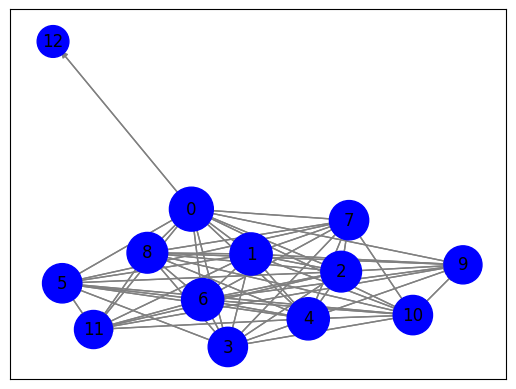

Closeness Centrality:
Node 0: 1.0000
Node 1: 0.9231
Node 2: 0.8571
Node 3: 0.8000
Node 4: 0.9231
Node 5: 0.8000
Node 6: 0.9231
Node 7: 0.8000
Node 8: 0.8571
Node 9: 0.7500
Node 10: 0.8000
Node 11: 0.7500
Node 12: 0.5217


In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")


## Menampilkan Tingkat similarity antar kalimat

In [ ]:
# Hitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Tampilkan hasil PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

for node, rank in sorted_pagerank:
    #kalimat = G.nodes[node]['kalimat']  # Mengakses kalimat yang terkait dengan simpul
    print(f"Node {node}: PageRank = {rank:.4f} Kalimatnya : {kal[node]}")

Node 0: PageRank = 0.1058 Kalimatnya :  Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.
Node 1: PageRank = 0.0901 Kalimatnya : Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.
Node 4: PageRank = 0.0901 Kalimatnya : Mereka telah bertanding dengan Barcelona dan Kashima Antlers pada Agustus lalu.
Node 6: PageRank = 0.0901 Kalimatnya : “Ini sesuai masukan dari Coach Frank yang sudah memilih lawan mana yang dihadapi Timnas U-17 di Jerman beberapa waktu lalu.
Node 2: PageRank = 0.0829 Kalimatnya : “Kita libatkan coach Frank Wormuth serta coach Indra Sjafri untuk

## Menghitung Eigen Vector dan Melakukan Pengurutan

In [ ]:
#Mencari Eigen Vector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

#Mengurutkan Eigen Vector dari yang tertinggi
sorted_eigen = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

#Menampilkannya dengan kalimat yang menyertai
for node, centrality in sorted_eigen :
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f} Kalimatnya : {kal[node]}")

Node 0: Eigenvector Centrality = 0.3227 Kalimatnya :  Jakarta (ANTARA) - Tim Nasional (Tim) Nasional Indonesia telah melakukan pemetaan kekuatan tim yang menjadi lawan-lawan mereka di babak penyisihan Grup A Piala Dunia U-17 yang digelar mulai 10 November.
Node 1: Eigenvector Centrality = 0.3196 Kalimatnya : Pelatih kepala Timnas Indonesia U-17 Bima Sakti di Jakarta, Senin mengatakan jajaran pelatih sudah melihat berbagai referensi seperti potongan video pertandingan untuk menganalisis kekuatan dan kelemahan tim-tim lawan yaitu Ekuador, Panama maupun Maroko yang akan mereka hadapi di Stadion Gelora Bung Tomo, Surabaya pada fase grup.
Node 4: Eigenvector Centrality = 0.3196 Kalimatnya : Mereka telah bertanding dengan Barcelona dan Kashima Antlers pada Agustus lalu.
Node 6: Eigenvector Centrality = 0.3196 Kalimatnya : “Ini sesuai masukan dari Coach Frank yang sudah memilih lawan mana yang dihadapi Timnas U-17 di Jerman beberapa waktu lalu.
Node 2: Eigenvector Centrality = 0.2946 Kalimatn